In [2]:
import torch
torch.cuda.is_available()

True

## 词频统计

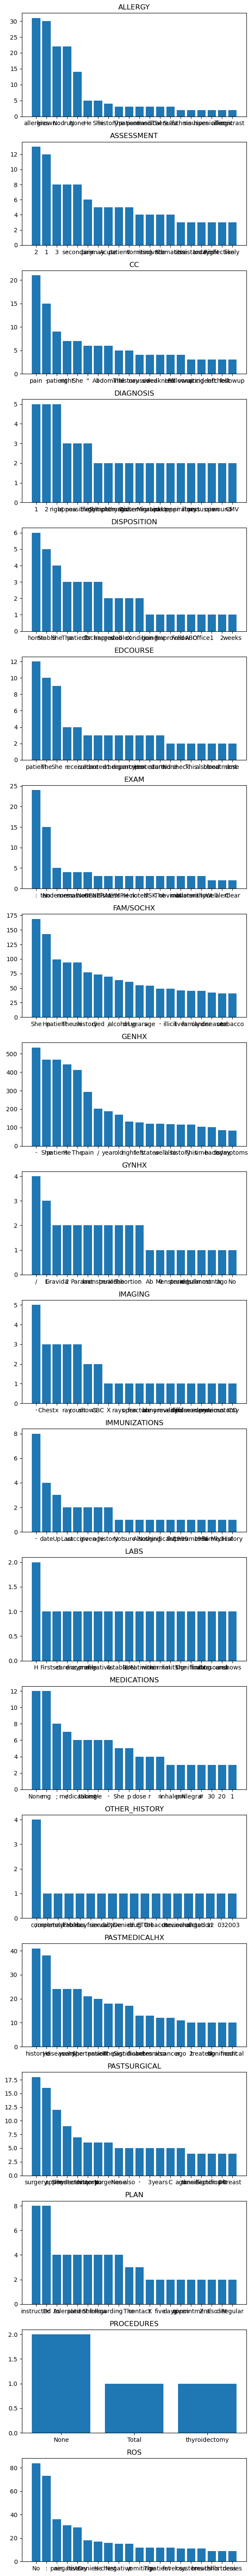

In [21]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
# 读入CSV文件
data = pd.read_csv('./MEDIQA-Chat-Training-ValidationSets-Feb-10-2023/TaskA/TaskA-TrainingSet.csv')

# 对'section_text'列中的文本进行分词
data['section_text'] = data['section_text'].apply(lambda x: ' '.join(jieba.cut(x)))

# 统计每一类的文本词语分布情况
word_count = {}
for group_name, group_data in data.groupby('section_header'):
    words = []
    for text in group_data['section_text']:
        words += text.split()
    word_count[group_name] = Counter(words)



# 绘制每一类的词语分布情况
# for group_name, word_counter in word_count.items():
#     plt.bar(word_counter.keys(), word_counter.values(), label=group_name)
# plt.legend()
# plt.show()

# 加载停用词列表
stop_words = set(stopwords.words('english')+[',','.'])

# 统计每一类的文本词语分布情况
word_count = {}
for group_name, group_data in data.groupby('section_header'):
    words = []
    for text in group_data['section_text']:
        words += [word for word in text.split() if word not in stop_words]
    word_count[group_name] = Counter(words)

# 绘制每一类的排名前10的词语
num_groups = len(word_count.keys())
fig, axs = plt.subplots(num_groups, 1, figsize=(6, 3 * num_groups))
for i, (group_name, group_word_count) in enumerate(word_count.items()):
    # 获取排名前10的词语和词频
    top_words = [word_count[0] for word_count in group_word_count.most_common(20)]
    top_word_counts = [word_count[1] for word_count in group_word_count.most_common(20)]

    # 绘制子图
    ax = axs[i]
    ax.bar(range(len(top_words)), top_word_counts)
    ax.set_xticks(range(len(top_words)),rotation=45, ha='right')
    ax.set_xticklabels(top_words)
    ax.set_title(group_name)
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## TASK A 的 section数目分布情况

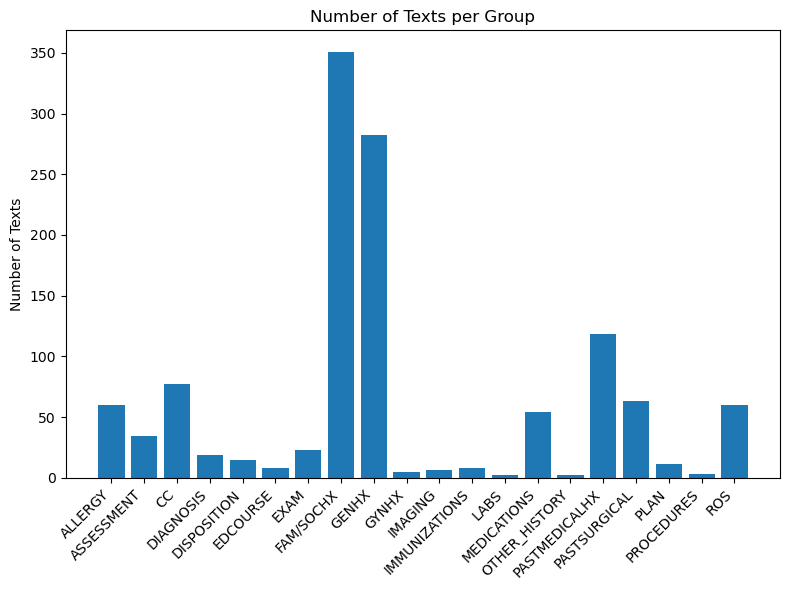

In [19]:
num_text_per_group = data.groupby('section_header')['section_text'].count()

# print(num_text_per_group)
# 绘制每一类的文本个数
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(num_text_per_group.index, num_text_per_group.values)
ax.set_ylabel('Number of Texts')
ax.set_title('Number of Texts per Group')

# 调整X轴标签
plt.xticks(rotation=45, ha='right')

# 调整图表布局
plt.tight_layout()

plt.show()

## 看每一类摘摘要的分布情况

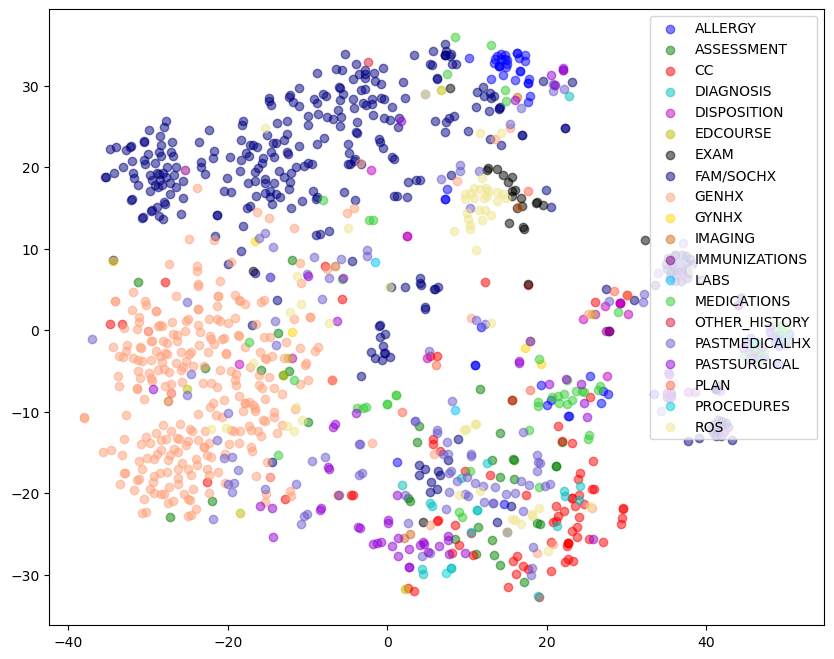

: 

In [37]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 读入CSV文件
data = pd.read_csv('./MEDIQA-Chat-Training-ValidationSets-Feb-10-2023/TaskA/TaskA-TrainingSet.csv')


# 加载sentence-transformers模型
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# 对'section_text'列中的文本进行向量化
vectors = model.encode(data['section_text'].tolist())

# 使用t-SNE将文本向量降维到二维空间中
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# 定义颜色列表
colors_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'navy', '#FFA07A', '#FFD700', '#D2691E', '#8B008B', '#00BFFF', '#32CD32', '#DC143C', '#6A5ACD', '#9400D3', '#FF6347', '#00CED1', '#F0E68C']

# 计算每一类的平均向量
mean_vectors = {}
for i, (group_name, group_data) in enumerate(data.groupby('section_header')):
    group_vectors = vectors[group_data.index, :]
    mean_vectors[group_name] = group_vectors.mean(axis=0)

# 在二维平面图中可视化每一类的平均向量位置
fig, ax = plt.subplots(figsize=(10, 8))
for i, (group_name, mean_vector) in enumerate(mean_vectors.items()):
    group_data = data[data['section_header'] == group_name]
    group_vectors = vectors_2d[group_data.index, :]
    ax.scatter(group_vectors[:, 0], group_vectors[:, 1], label=group_name, alpha=0.5, color=colors_list[i])
    # ax.annotate(group_name, xy=mean_vector
ax.legend()
plt.show()

## 每一类对话的分布情况

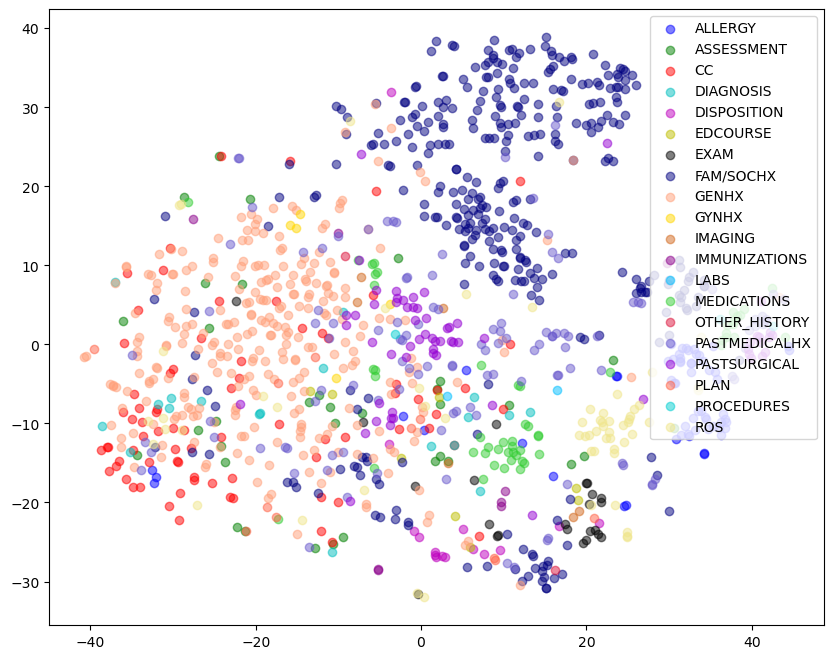

In [36]:
# 对'section_text'列中的文本进行向量化
vectors = model.encode(data['dialogue'].tolist())

# 使用t-SNE将文本向量降维到二维空间中
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)


colors_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'navy', '#FFA07A', '#FFD700', '#D2691E', '#8B008B', '#00BFFF', '#32CD32', '#DC143C', '#6A5ACD', '#9400D3', '#FF6347', '#00CED1', '#F0E68C']

# 计算每一类的平均向量
mean_vectors = {}
for group_name, group_data in data.groupby('section_header'):
    group_vectors = vectors[group_data.index, :]
    mean_vectors[group_name] = group_vectors.mean(axis=0)
fig, ax = plt.subplots(figsize=(10, 8))
for i, (group_name, mean_vector) in enumerate(mean_vectors.items()):
    group_data = data[data['section_header'] == group_name]
    group_vectors = vectors_2d[group_data.index, :]
    ax.scatter(group_vectors[:, 0], group_vectors[:, 1], label=group_name, alpha=0.5,color=colors_list[i])
    #ax.annotate(group_name, xy=mean_vector[:2], textcoords='offset points', xytext=(0, 10), ha='center')
ax.legend()
plt.show()

我的csv文件里的'note'列里面有需要进行截断的文本，['CHIEF COMPLAINT',‘PAST SURGICAL HISTORY’,'REVIEW OF SYSTEMS','EMERGENCY DEPARTMENT COURSE','GYNECOLOGIC HISTORY','PAST MEDICAL HISTORY','HISTORY of PRESENT ILLNESS','FAMILY HISTORY/SOCIAL HISTORY']，当这些节标题出现的时候我需要对note里面的文本进行截断，以这些节标题作为key，以这些节标题后对应的文本为values,保存到字典中，最后以'encounter_id'列里对应的id存到json中